# Pymaceuticals Inc.
---

### Analysis

- 
From the broadest viewpoint, given the results displayed in the box-plot titled “Distribution of Final Tumor Volumes per Drug Regimen”, it is clear that Ramicane was the most effective drug in shrinking Tumor Volume compared to Capomulin, Infubinol, and Ceftamin; Capomulin was a close second. However, in interpreting this data, I believe it is significant to note that none of the figures produced in this notebook reveal the number of mice observed on each drug regimen. Assuming that these numbers are roughly equal, the bar plot titled “Observed Timepoints per Drug Regimen” confirms the findings that Ramicane and Capomulin were two of the most effective drugs on the whole as they have a significantly higher number of observed timepoints. This likely indicates that mice survived longer on Ramicane and Capomulin than the other drugs trialed in the study. 

To further the understanding of the effectiveness of Ramicane and Capomulin, particularly in comparison to the rest of the data, I referred back to the “Summary Statistics” table. Again, assuming all the mice observed in the study initially had tumors that were of the similar volumes, Ramicane and Capomulin have similar a “Mean Tumor Volume”, both of which are considerably lower than those of the rest of the trial drugs. In addition, the foregoing was also true their “Tumor Volume Variance”s. From this, one can infer that Ramicane and Capomulin are not only more effective but also more consistent in delivering the expected result of shrinking SSC tumors. 

Last but not least, the linear regression model, which compares the average weight of a mouse in the study with the average tumor volume, clearly reveals that there is a positive relationship between those two factors. Beyond simply looking at the proximity of the points on the plot to the regression line (which can often be misleading), the calculated Pearson-R Coefficient of 0.84 confirms that there is a strong indication of simultaneous positive variability. In other words, one can reliably assume that in general higher weights will likely mean larger tumor volumes. The regression line on the plot, however, also shows that the equation does not perfectly account for variability in tumor volume that occurs at each weight. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combinedDF = pd.merge(mouse_metadata, study_results, how="left")

# Display the data table for preview
combinedDF.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combinedDF["Mouse ID"].unique())

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# The duplicated function syntax below was sourced from GeeksforGeeks.org. 

duplicates = combinedDF[combinedDF.duplicated(["Mouse ID", "Timepoint"], keep=False)]
duplicates["Mouse ID"]

908    g989
909    g989
910    g989
911    g989
912    g989
913    g989
914    g989
915    g989
916    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicateDF = combinedDF.loc[combinedDF["Mouse ID"] == "g989"]
duplicateDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = combinedDF.loc[combinedDF["Mouse ID"] != "g989"]
cleanDF.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(cleanDF["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

meanTV = cleanDF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
medianTV = cleanDF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
varTV = cleanDF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
stdTV = cleanDF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
semTV = cleanDF.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

drug_summary = pd.DataFrame(
    {
        "Mean Tumor Volume": meanTV,
        "Median Tumor Volume": medianTV,
        "Tumor Volume Variance": varTV,
        "Tumor Volume Std. Dev.": stdTV,
        "Tumor Volume Std. Err.": semTV
    }
)

drug_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
#The aggregation function syntax below was sourced from pandas.pydata.org.

cleanDF.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Observed Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

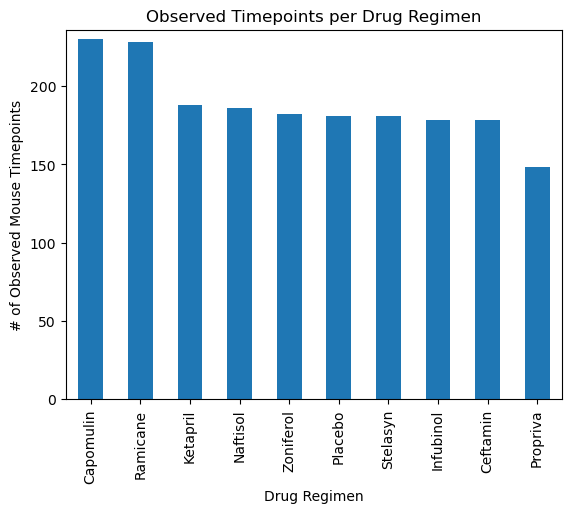

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Drugs = cleanDF["Drug Regimen"].value_counts()
Drugs.plot(kind= "bar", ylabel= "# of Observed Mouse Timepoints", title= "Observed Timepoints per Drug Regimen", xlim=(0,len(Drugs)), ylim=(0,Drugs.max()+6))

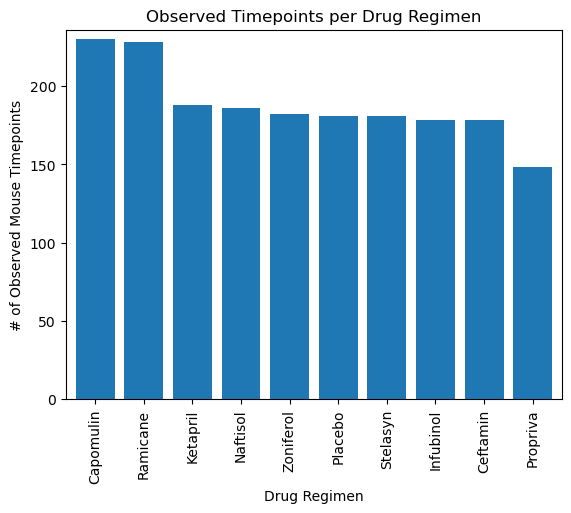

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_Axis = Drugs.index
plt.bar(x_Axis, Drugs, align= "center")
plt.xticks(rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Observed Timepoints per Drug Regimen")
plt.xlim(-0.6, len(x_Axis)-0.4)
plt.ylim(0, Drugs.max()+6)
plt.show()

<Axes: title={'center': 'Gender Distribution of Mice in SCC Study'}, ylabel='Sex'>

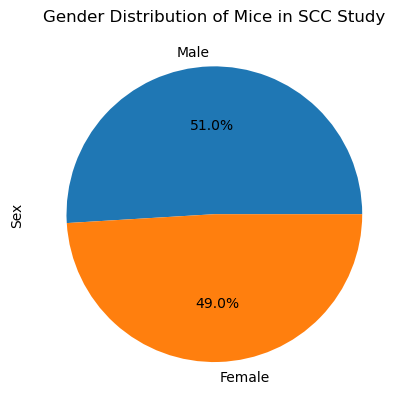

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderDist= cleanDF["Sex"].value_counts()
genderDist.plot(kind="pie", ylabel = "Sex", autopct = "%1.1f%%", title = "Gender Distribution of Mice in SCC Study")

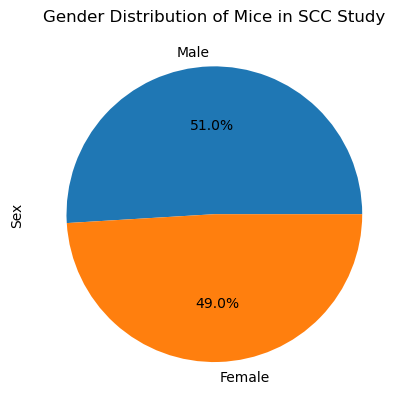

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(genderDist, labels = genderDist.index, autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.title("Gender Distribution of Mice in SCC Study")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_Time = cleanDF.groupby(["Mouse ID"])["Timepoint"].max()
last_Time.reset_index

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_Tumor = pd.merge(last_Time, cleanDF, how="left", on=["Mouse ID", "Timepoint"])
last_Tumor

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
TumorVols = []

    # add subset
    
for treatment in Treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    TumorVols.append(last_Tumor.loc[last_Tumor["Drug Regimen"]== treatment, "Tumor Volume (mm3)"])
    #Place the forgoing simultaneously in a dataframe
    last_TumorDF = last_Tumor.loc[last_Tumor["Drug Regimen"]== treatment,"Tumor Volume (mm3)"]
    # Calculate the IQR and quantitatively
    quartiles = last_TumorDF.quantile([0.25,0.50,0.75])
    IQR = (quartiles[0.75]) - (quartiles[0.25])
    lowerW = ((quartiles[0.25]) - (1.5*IQR))
    upperW = ((quartiles[0.75]) + (1.5*IQR))
    # Determine outliers using upper and lower bounds
    outliers = last_TumorDF.loc[(last_TumorDF < lowerW) | (last_TumorDF > upperW)]
    
    print(f"{treatment}'s potential outlier's: {outliers}")

Capomulin's potential outlier's: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outlier's: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outlier's: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outlier's: Series([], Name: Tumor Volume (mm3), dtype: float64)


Text(0.5, 1.0, 'Distribution of Final Tumor Volumes per Drug Regimen')

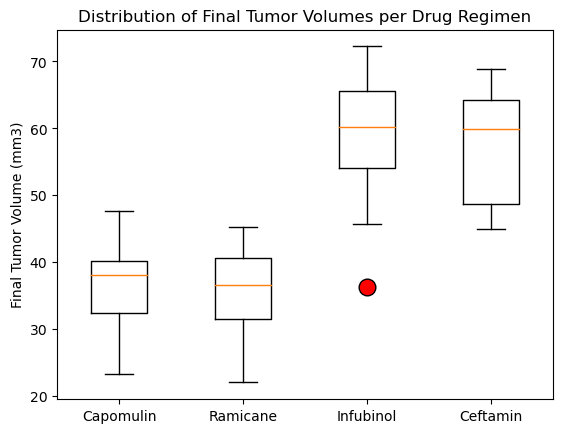

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#The "flierprops" parameter was sourced from a StackOverflow board. 
plt.boxplot(TumorVols, flierprops={"markerfacecolor": "red", "markersize": 12})
plt.xticks([1,2,3,4],Treatments)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Distribution of Final Tumor Volumes per Drug Regimen")

## Line and Scatter Plots

Enter the ID# of a mouse treated with Capomulin to display a plot with 'Tumor Volume' over 'Time'.s185


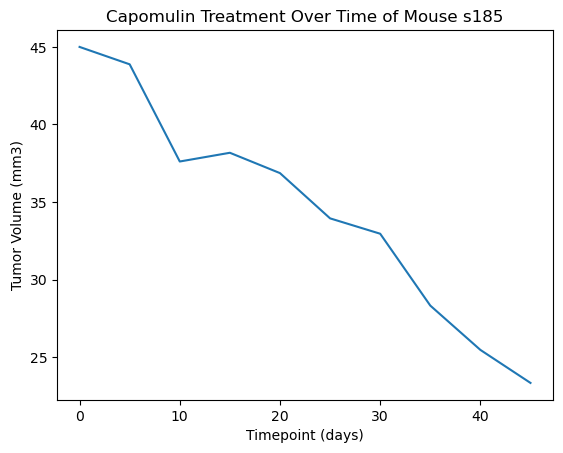

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
miceonC = cleanDF.loc[(cleanDF["Drug Regimen"] == "Capomulin")]
ID = miceonC["Mouse ID"].value_counts()
IDs = ID.index

MouseID = input("Enter the ID# of a mouse treated with Capomulin to display a plot with 'Tumor Volume' over 'Time'.")

#The.values function was sourced from GeeksforGeeks to assist in data validation of the MouseID input. 
while MouseID not in miceonC.values:
    print("\nThe ID# entered is not recognized. Please choose again from the list below.\n")
    print(f"{IDs}\n")
    MouseID = input("Enter the ID# of the mouse for which you would like to see 'Tumor Volume' over 'Time'.")

x_Axis = cleanDF.loc[(cleanDF["Mouse ID"] == MouseID), "Timepoint"]
mouseplot = cleanDF.loc[(cleanDF["Mouse ID"] == MouseID), "Tumor Volume (mm3)"]
plt.plot(x_Axis, mouseplot)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment Over Time of Mouse {MouseID}")
plt.show()


Text(0.5, 1.0, 'Comparison of Avg Weight and Tumor Volume on Capomulin')

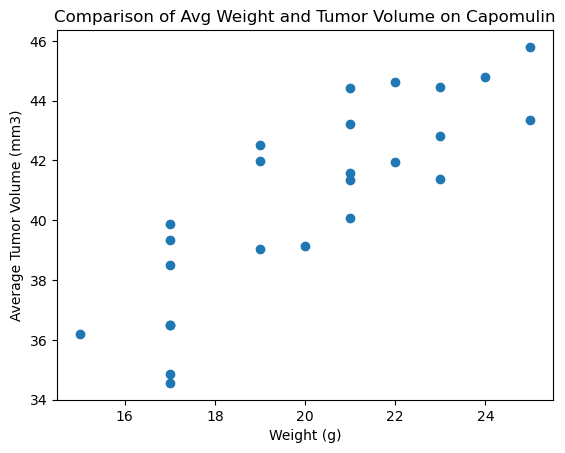

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
miceonC = cleanDF.loc[(cleanDF["Drug Regimen"] == "Capomulin")]
avgTumorVol = miceonC.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
avgWeight = miceonC.groupby(["Mouse ID"])["Weight (g)"].mean()
plt.scatter(avgWeight, avgTumorVol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Comparison of Avg Weight and Tumor Volume on Capomulin")

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84.


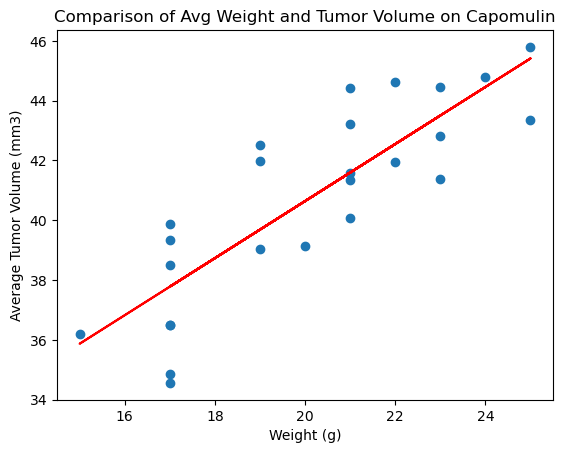

In [24]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
PearsonR = st.pearsonr(avgWeight, avgTumorVol)
print(f"The correlation between mouse weight and average tumor volume is {PearsonR[0]:.2f}.")

plt.scatter(avgWeight, avgTumorVol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Comparison of Avg Weight and Tumor Volume on Capomulin")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avgWeight, avgTumorVol)
regress_values = (avgWeight * slope)+ intercept
plt.plot(avgWeight, regress_values, "r-")

plt.show()
